## Importing necessary Libraries

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


## Preprocessing the data

In [4]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

## Creating the model

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encodings
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define the CNN model directly in the Sequential constructor
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")



Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.1525 - accuracy: 0.9539 - val_loss: 0.0510 - val_accuracy: 0.9838
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0366 - val_accuracy: 0.9888
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0320 - val_accuracy: 0.9891
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0289 - val_accuracy: 0.9906
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0356 - val_accuracy: 0.9887
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 

## Plotting the metrics

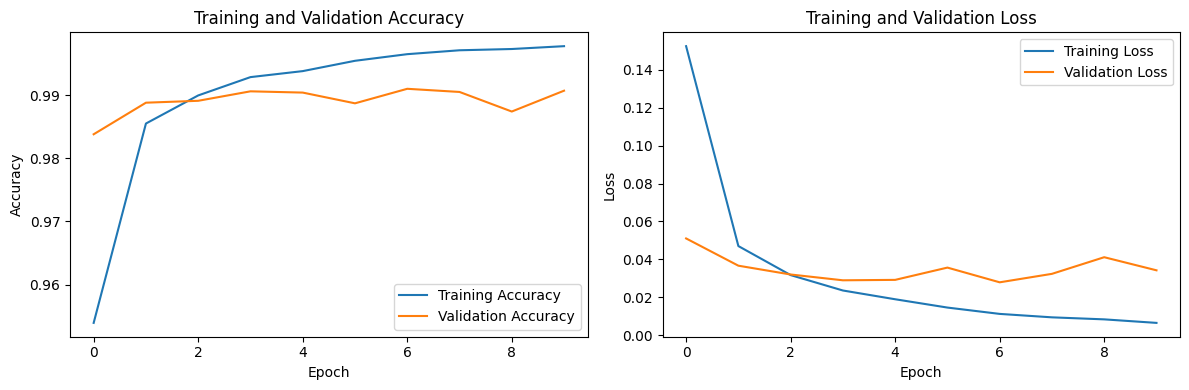

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Save and download the model

In [11]:
model.save("mnist_model.h5")

from google.colab import files
files.download('mnist_model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>